<a href="https://colab.research.google.com/github/anelglvz/Deep_Learning/blob/main/Clasificador_de_Textos_con_TF_y_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificador de Textos con TF y Bert

https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.86239&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Cargar Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam_ham_dataset.csv',
                  usecols=['text','label_num'] )
datos.columns=['text','spam']

print(datos.shape)
datos.head()

(5171, 2)


,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
datos['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

## Primer Caso usando TFIDF

### Preprocesamiento de textos

In [ ]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords + 'subject'
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')+(['subject'])) + r')\b\s*')
  texto = stop.sub('', texto)

  #quita puntuaciones y números
  texto = re.sub('[^a-z]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  st = PorterStemmer()
  texto = texto.split()
  texto = ' '.join([st.stem(i) for i in texto])

  return(texto)

In [ ]:
st = PorterStemmer()
print(st.stem('finished'))
print(st.stem('finishing'))

finish
finish


In [ ]:
datos['text_pp'] = datos['text'].apply(preprocesar)
datos

,text,spam,text_pp
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year ...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas d...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu unders...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volum decreas contract thank ...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom hpl take extra mmcf weekend tri nex...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli mention earlier hop...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet august activ attach workshe...


### Vectorización de Texto mediante BOW

In [ ]:
tfidf = TfidfVectorizer(min_df=3) #matrix of TF-IDF features
mdt_tfidf = tfidf.fit_transform(datos['text_pp'])
palabras = tfidf.get_feature_names_out()
MDT = pd.DataFrame(mdt_tfidf.todense(),
                              index=datos.index,
                              columns=palabras)
print(MDT.shape)
MDT

(5171, 10376)


,aa,aalland,aaron,ab,aba,aback,abacu,abacustech,abandon,abash,...,zodiac,zoloft,zone,zonedubai,zonewww,zs,zu,zurich,zwallet,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
MDT.describe()

,aa,aalland,aaron,ab,aba,aback,abacu,abacustech,abandon,abash,...,zodiac,zoloft,zone,zonedubai,zonewww,zs,zu,zurich,zwallet,zyban
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,...,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.000557,0.000023,0.000046,0.000272,0.000125,0.000052,0.000253,0.000560,0.000032,0.000075,...,0.000164,0.000162,0.001978,0.000394,0.000040,0.000119,0.000220,0.000061,0.000066,0.000417
std,0.011533,0.000980,0.001798,0.008046,0.003935,0.002281,0.006873,0.014691,0.001418,0.003594,...,0.007003,0.005369,0.018518,0.004780,0.001742,0.006335,0.008169,0.002677,0.002839,0.008319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.545314,0.046850,0.109319,0.296534,0.166888,0.131470,0.235011,0.470023,0.082434,0.234550,...,0.381235,0.217112,0.349877,0.078336,0.088502,0.438051,0.462291,0.153084,0.144276,0.316011


### Dividir conjunto de entrenamiento y prueba

In [ ]:
X = mdt_tfidf.toarray()
y = datos['spam']

print(X)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: spam, Length: 5171, dtype: int64

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=3)

In [ ]:
#Conjunto de entrenamiento
X_train.shape, y_train.shape

((4136, 10376), (4136,))

In [ ]:
#Conjunto de prueba
X_test.shape, y_test.shape

((1035, 10376), (1035,))

### Diseño del modelo de red neuronal usando TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0




TensorFlow y Keras, ambos proyectos para el aprendizaje profundo,tienen una historia entrelazada. Keras era un conjunto de abstracciones que facilita el aprendizaje profundo, pero necesitada de un backend, desde la versión de Keras v1.1.0 TensorFlow fue el backend predeterminado (antes era Theano).

A partir del lanzamiento de TensorFlow a mediados de 2019, Keras es ahora la API de alto nivel de TensorFlow para facilitar el diseño y entrenamiento de modelos rápidos y fáciles.

[Video sobre TensorFlow 2.0](https://www.youtube.com/watch?v=EqWsPO8DVXk)

In [ ]:
model = tf.keras.Sequential([                     # https://www.tensorflow.org/guide/keras/sequential_model

        tf.keras.Input(shape=(X.shape[1],)),              # El número de neuronas en la capa de entrada es igual al número de características o dimensiones en los datos.

        tf.keras.layers.Dense(
                              1,                     # dimensiones de salida
                              activation='sigmoid',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                              name="layer_1"         # nombre de la capa

                              )
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


### Alternativas para inicializar una red Secuencial

Una alternativa para establecer las dimensiones de entrada en la primera capa es utilizar el parámetro `input_shape`

In [ ]:
model = tf.keras.Sequential([

          tf.keras.layers.Dense(1,
                                input_shape = (X.shape[1],),      # dimensiones de la entrada
                                activation='sigmoid',             # para la regresión logística
                                name="layer_1"                    # nombre de la capa
                                ),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


Otra manera de construir un modelo secuencial es declararlo y a continuación añadir capas utilizando el método `add`

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(X.shape[1],)))

model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid',        # para la regresión logística
                                  name="layer_1"
                                 ))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


Que es lo mismo a:

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1,
                                  input_shape = (X.shape[1],),
                                  activation='sigmoid',        # para la regresión logística
                                  name="layer_1"
                                 ))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


### Añadir y borrar capas, consultar número de capas de la red y  visualizar modelo,

In [ ]:
model.add(tf.keras.layers.Dense(2,
                                  activation='softmax',
                                  name="layer_4")
                                  )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
 layer_4 (Dense)             (None, 2)                 4         
                                                                 
Total params: 10,381
Trainable params: 10,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.layers)  # layers es un atributo del modelo que regresa una lista con las capas del modelo

2

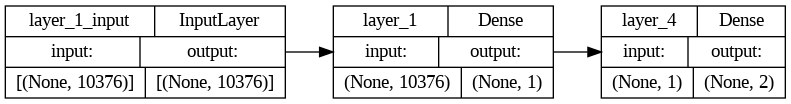

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

Para borrar la última capa

In [ ]:
model.pop()    # borra la última capa
print(len(model.layers))
model.summary()


1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


Última manera:

In [ ]:
inp1 = tf.keras.Input(shape=(X.shape[1],))              # El número de neuronas en la capa de entrada es igual al número de características o dimensiones en los datos.

prim = tf.keras.layers.Dense(
                    1,                     # dimensiones de salida
                    activation='sigmoid',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                    name = 'layer_1'       # nombre de la capa

                    )
out1 = prim(inp1)

seg = tf.keras.layers.Dense(
                    2,                     # dimensiones de salida
                    activation='sigmoid',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                    name = 'capa_a_eliminar'        # nombre de la capa

                    )
out2 = seg(out1)

ter = tf.keras.layers.Dense(
                    1,                     # dimensiones de salida
                    activation='softmax',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                    name= 'layer_3'        # nombre de la capa

                    )

out3 = ter(out2)


In [ ]:
model = tf.keras.models.Model(inp1, out3)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10376)]           0         
                                                                 
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
 capa_a_eliminar (Dense)     (None, 2)                 4         
                                                                 
 layer_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 10,384
Trainable params: 10,384
Non-trainable params: 0
_________________________________________________________________


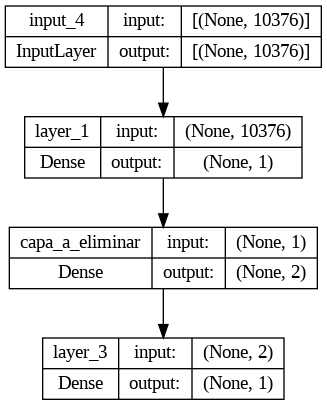

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=96,
)

### Entrenamiento y validación

Despues de construir la red neuronal se debe configurar el proceso de entrenamiento utilizando el metodo `compile()`


In [ ]:
model.compile(optimizer='adam',             # el optimizador sirve para encontrar los pesos que minimizan la función de pérdida
                                            # adam: stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/

              loss='binary_crossentropy',   # función que evalua que tan bien el algoritmo modela el conjunto de datos
                                            # https://keras.io/api/losses/

              metrics=['accuracy', 'mae']
              )


Para entrenar el módelo utilizamos el método `fit()`

el parámetro epoch se puede usar para buscar minimizar el error, aunque también podemos caer en sobreajuste

In [ ]:
model.fit( X_train, y_train,
          epochs=10,         # número de iteraciones sobre los datos (epocas)
          batch_size = 32)

Epoch 1/10
130/130 [==============================] - 6s 4ms/step - loss: 0.6460 - accuracy: 0.2884 - mae: 0.7116
Epoch 2/10
130/130 [==============================] - 1s 4ms/step - loss: 0.6136 - accuracy: 0.2884 - mae: 0.7116
Epoch 3/10
130/130 [==============================] - 1s 6ms/step - loss: 0.5944 - accuracy: 0.2884 - mae: 0.7116
Epoch 4/10
130/130 [==============================] - 1s 6ms/step - loss: 0.5800 - accuracy: 0.2884 - mae: 0.7116
Epoch 5/10
130/130 [==============================] - 1s 6ms/step - loss: 0.5653 - accuracy: 0.2884 - mae: 0.7116
Epoch 6/10
130/130 [==============================] - 1s 5ms/step - loss: 0.5493 - accuracy: 0.2884 - mae: 0.7116
Epoch 7/10
130/130 [==============================] - 1s 5ms/step - loss: 0.5324 - accuracy: 0.2884 - mae: 0.7116
Epoch 8/10
130/130 [==============================] - 1s 6ms/step - loss: 0.5150 - accuracy: 0.2884 - mae: 0.7116
Epoch 9/10
130/130 [==============================] - 1s 6ms/step - loss: 0.4970 - accur

El 130/130 que vemos es el resultado redondeado hacia arriba, de dividir el número de registros en el conjunto de entrenamiento entre 32, que es el parámetro por defaul para batch_size

In [ ]:
# batch_size
X_train.shape[0]/32

129.25

### Red neuronal de clasificación con más de una capa

In [ ]:
model = tf.keras.Sequential()

model.add((tf.keras.layers.InputLayer(input_shape=(X.shape[1],))))

model.add(tf.keras.layers.Dense((2/3 * X.shape[1]  + 1 ), activation='relu',name="hidden_layer_1" ))

model.add(tf.keras.layers.Dense(1,activation='sigmoid', name="output_layer" ))



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 6918)              71788086  
                                                                 
 output_layer (Dense)        (None, 1)                 6919      
                                                                 
Total params: 71,795,005
Trainable params: 71,795,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(10377*6918) #Parámetros para la primera capa
print(71788086+6918) #Sumamos los sesgos
print('Numero de parámetros:', model.count_params() ) #Solo se le suma el último sesgo

71788086
71795004
Numero de parámetros: 71795005


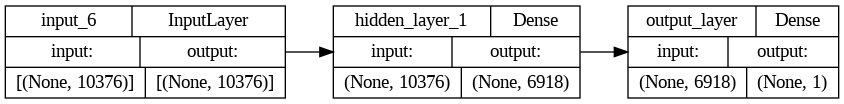

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [ ]:
model.compile(optimizer='adam',             # stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/

              loss='binary_crossentropy',   # función objetivo  que se busca minimizar
                                            # https://keras.io/api/losses/

              metrics=['accuracy']
              )
model.fit(X_train, y_train,
          epochs=5,
          )

Epoch 1/5
130/130 [==============================] - 3s 16ms/step - loss: 0.1227 - accuracy: 0.9441
Epoch 2/5
130/130 [==============================] - 2s 16ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 3/5
130/130 [==============================] - 2s 17ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/5
130/130 [==============================] - 2s 17ms/step - loss: 4.6524e-04 - accuracy: 1.0000
Epoch 5/5
130/130 [==============================] - 2s 16ms/step - loss: 2.8406e-04 - accuracy: 1.0000


Predicciones!

In [ ]:
y_pred = model.predict(X_test)
y_pred

33/33 [==============================] - 0s 3ms/step


array([[9.87611949e-01],
       [9.99217629e-01],
       [1.50071278e-09],
       ...,
       [2.76962191e-01],
       [9.99873400e-01],
       [1.39196875e-11]], dtype=float32)

In [ ]:
y_test

4020    1
3561    1
3434    0
111     0
1126    0
       ..
2078    1
334     1
4746    0
2850    1
2180    0
Name: spam, Length: 1035, dtype: int64

In [ ]:
#Obtenemos el MSE
mean_squared_error(y_pred,y_test)

0.011620259266882945

In [ ]:
y_pred_aux = [1 if x>0.5 else 0 for x in y_pred]
y_pred_aux[:10]

[1, 1, 0, 0, 0, 0, 1, 0, 0, 1]

Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred_aux)

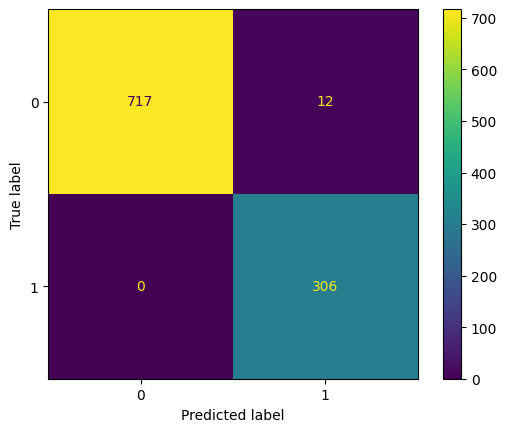

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred_aux)
Accuracy

0.9884057971014493

In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0]*len(y_test)

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

Sin entrenar: ROC AUC=0.500
Red Sequencial: ROC AUC=0.998


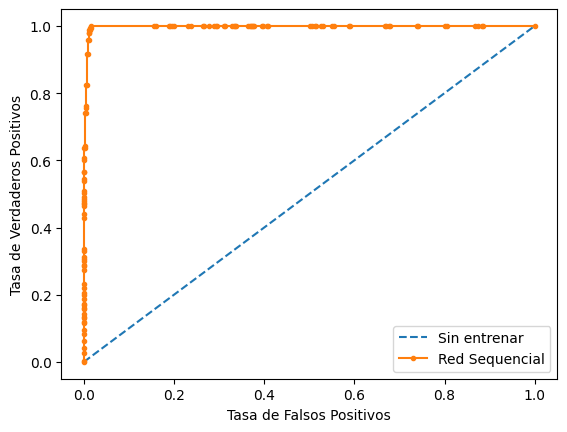

In [ ]:
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Sequencial: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Red Sequencial')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

## Segundo Caso usando BERT

In [ ]:
print(datos.shape)
datos.head()

(5171, 3)


,text,spam,text_pp
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year ...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas d...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu unders...


In [ ]:
X = datos['text']
y = datos['spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(4136,)
(1035,)


Modelo

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 81.4 MB/s eta 0:00:00


In [ ]:
import tensorflow_text as text
import tensorflow_hub as hub

In [ ]:
text_inputs = tf.keras.layers.Input((), dtype=tf.string)

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


outputs1 = preprocessor(text_inputs)

outputs2 = encoder(outputs1)
pooled_output = outputs2["pooled_output"]      # [batch_size, 768].
sequence_output = outputs2["sequence_output"]  # [batch_size, 128, 768].

flatting = tf.keras.layers.Flatten()
flatted = flatting(sequence_output)

layer1 = tf.keras.layers.Dense(10, activation='relu',name="hidden_layer_1")
layer1out = layer1(flatted)

layer2 = tf.keras.layers.Dense(1,activation='sigmoid', name="output_layer" )
final_output = layer2(layer1out)

model = tf.keras.Model(text_inputs, final_output)


In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['input_7[0][0]']                
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

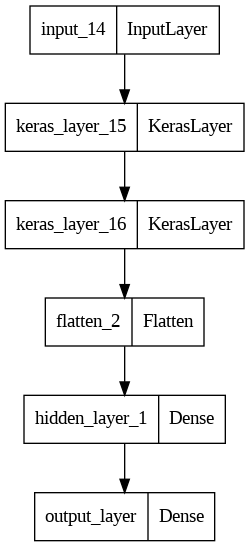

In [ ]:
tf.keras.utils.plot_model(
    model,
    #to_file="model.png",
    #show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    #dpi=180,
)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(
    X_train,
    y_train,
    #validation_data=(X_test, y_test), # Implementarlo a veces ayuda
    epochs=6,
    batch_size=54
)

Epoch 1/6
77/77 [==============================] - 68s 614ms/step - loss: 1.0150 - accuracy: 0.6707
Epoch 2/6
77/77 [==============================] - 46s 604ms/step - loss: 0.6758 - accuracy: 0.7084
Epoch 3/6
77/77 [==============================] - 47s 614ms/step - loss: 0.6641 - accuracy: 0.7084
Epoch 4/6
77/77 [==============================] - 47s 614ms/step - loss: 0.6538 - accuracy: 0.7084
Epoch 5/6
77/77 [==============================] - 47s 613ms/step - loss: 0.6451 - accuracy: 0.7084
Epoch 6/6
77/77 [==============================] - 48s 618ms/step - loss: 0.6376 - accuracy: 0.7084


Predicciones

In [ ]:
y_pred = model.predict(X_test)
y_pred

33/33 [==============================] - 12s 344ms/step


array([[3.5856066e-23],
       [9.9999988e-01],
       [3.5352621e-10],
       ...,
       [9.9999464e-01],
       [2.1872409e-06],
       [1.1355186e-17]], dtype=float32)

In [ ]:
y_test

1566    0
1988    1
1235    0
2868    0
4903    0
       ..
1175    1
4476    0
4198    1
2689    0
2142    0
Name: spam, Length: 1035, dtype: int64

In [ ]:
#Obtenemos el MSE
mean_squared_error(y_pred,y_test)

0.018429367212909904

In [ ]:
y_pred_aux = [1 if x>0.5 else 0 for x in y_pred]
y_pred_aux[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred_aux)

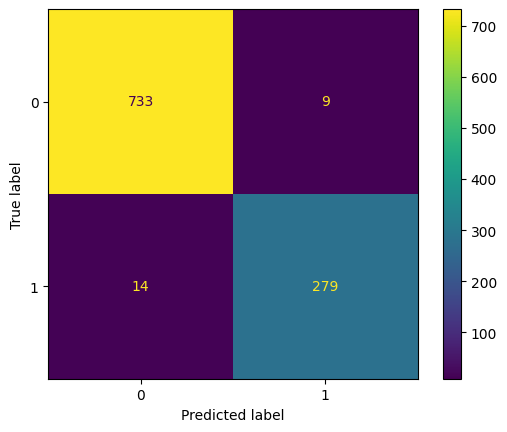

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred_aux)
Accuracy

0.9777777777777777

In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0]*len(y_test)

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

Sin entrenar: ROC AUC=0.500
Red Sequencial: ROC AUC=0.995


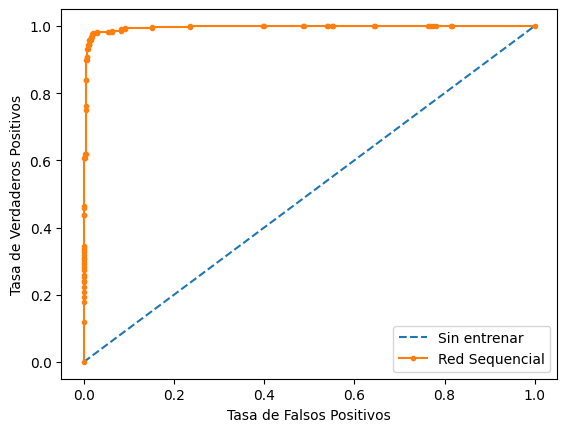

In [ ]:
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Sequencial: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Red Sequencial')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

# Referencia:

1. Keras vs. tf.keras: What’s the difference in TensorFlow 2.0? [Internet]. PyImageSearch. 2019 [citado 20 de julio de 2021]. Disponible en: https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

1. Krishnan S. How to determine the number of layers and neurons in the hidden layer? [Internet]. Geek Culture. 2021 [citado 25 de abril de 2022]. Disponible en: https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3

